In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pyworld as pw

In [2]:
y, sr = librosa.load('data/real_audio/1-2.wav')

(1, 8421) (513, 8421) (513, 8421)


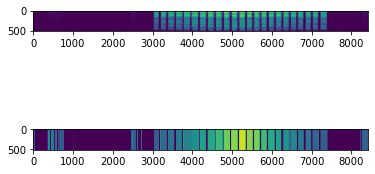

In [6]:
x = y.astype(np.float64)
f0, timeaxis = pw.harvest(x, sr, frame_period=10)
spec = pw.cheaptrick(x, f0, timeaxis, sr).T
f0 = np.reshape(f0, (1, spec.shape[1]))
f0_mat = np.repeat(f0, spec.shape[0], axis=0)

print(f0.shape, spec.shape, f0_mat.shape)
plt.subplot(2, 1, 1)
plt.imshow(np.log(spec + 1e-10))
plt.subplot(2, 1, 2)
plt.imshow(f0_mat)

In [22]:
def generate_overlapadd(data):
    input_size = data.shape[1]
    time_frame = data.shape[0] * 2
    overlap = time_frame // 2
    num_frames = int(np.ceil(input_size / overlap)) - 1
    print(input_size, time_frame, overlap, num_frames)
    padded = np.zeros((data.shape[0], overlap * (num_frames + 1)))
    padded[:,:data.shape[1]] = data
    frames = []
    i = 0
    start = 0
    while i < num_frames:
        frames.append(padded[:,start:start+time_frame])
        i += 1
        start += overlap
    return frames

In [23]:
generate_overlapadd(spec)

8421 1026 513 16


[array([[3.43946414e-28, 6.60594598e-28, 1.41957473e-28, ...,
         1.22148424e-28, 9.22909243e-28, 1.10284580e-27],
        [3.44041277e-28, 6.61110544e-28, 1.42053576e-28, ...,
         1.22095924e-28, 9.22097102e-28, 1.10147593e-27],
        [3.44274143e-28, 6.62623026e-28, 1.42326868e-28, ...,
         1.21941321e-28, 9.19873153e-28, 1.09746107e-27],
        ...,
        [1.91292974e-28, 7.07138249e-29, 4.96657548e-29, ...,
         2.38078496e-29, 3.41120760e-29, 4.96671322e-29],
        [1.90502389e-28, 7.06072506e-29, 4.87403930e-29, ...,
         2.29681040e-29, 3.34439791e-29, 4.95531869e-29],
        [1.90201131e-28, 7.05788469e-29, 4.84519843e-29, ...,
         2.26971849e-29, 3.32325025e-29, 4.95157463e-29]]),
 array([[1.26915577e-09, 1.56463866e-09, 1.32161111e-08, ...,
         2.78889514e-28, 4.50956408e-28, 1.36507812e-28],
        [1.27229696e-09, 1.56250581e-09, 1.30875089e-08, ...,
         2.78787484e-28, 4.51180366e-28, 1.36548604e-28],
        [1.28621675e-09, 